## TASK 3: EXPLORATORY DATA ANALYSIS - RETAIL
### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
### As a business manager, try to find out the weak areas where you can
### work to make more profit.
### What all business problems you can derive by exploring the data?

### By:
### Bhawana Tripathi 

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

READING DATA

In [2]:
data=pd.read_csv(r"C:\Users\HP\Desktop\DATASETS\SampleSuperstore.csv")
print(data.shape)
data.head()

(9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


UNDERSTANDING AND CLEANING DATA:

In [3]:
data.drop(['Country','Postal Code'],axis=1,inplace=True)
#REMOVING UNWANTED FEATURES

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [5]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#IDENTIFYING REDUNDANT VALUES AND REMOVING THEM

print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
data.head()

50


,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
#NO. OF UNIQUE VALUES THE FEATURES HAVE

data.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

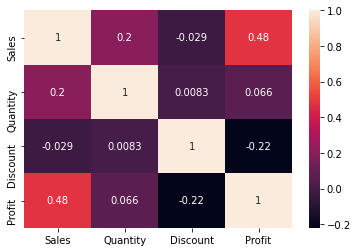

In [8]:
# ANALYSING CORRELATION BETWEEN DIFFERENT FEATURES

sns.heatmap(data.corr(),annot=True)
plot.show()

###### Profit and Sales are highly positively correlated
###### Discount and Sales show negative correlation


# PERFORMING EDA 

In [9]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

{'Standard Class': 5930, 'Second Class': 1941, 'First Class': 1531, 'Same Day': 542}


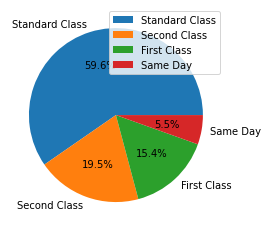

In [10]:
v=dict(data['Ship Mode'].value_counts())
print(v)
plot.pie(v.values(),labels=v.keys(), autopct='%1.1f%%')
plot.legend()
plot.show()

###### Standard class is most widely used shipment mode
###### Same day shipping mode is not much preferred

In [11]:
s=data.groupby("Segment")[['Sales','Profit']].sum()
d=dict(s)
print(d)

{'Sales': Segment
Consumer       1.159418e+06
Corporate      7.059702e+05
Home Office    4.292117e+05
Name: Sales, dtype: float64, 'Profit': Segment
Consumer       133939.5218
Corporate       91911.1606
Home Office     60246.8755
Name: Profit, dtype: float64}


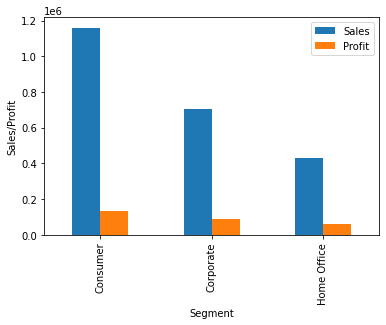

In [12]:
s.plot.bar()
plot.ylabel('Sales/Profit')
plot.title('Segment Vs Sales/Profit')
plot.show()

###### Highest sales are generated by consumer segment
###### Although sales vary amongst different segments, profit doesn't show much variance
###### Consumer segment generates highest profit

In [13]:
c=data.groupby('State')['Profit'].sum()

print(c.head())
d=dict(c)

State
Alabama        5786.8253
Arizona       -3427.9246
Arkansas       4008.6871
California    76215.9705
Colorado      -6527.8579
Name: Profit, dtype: float64


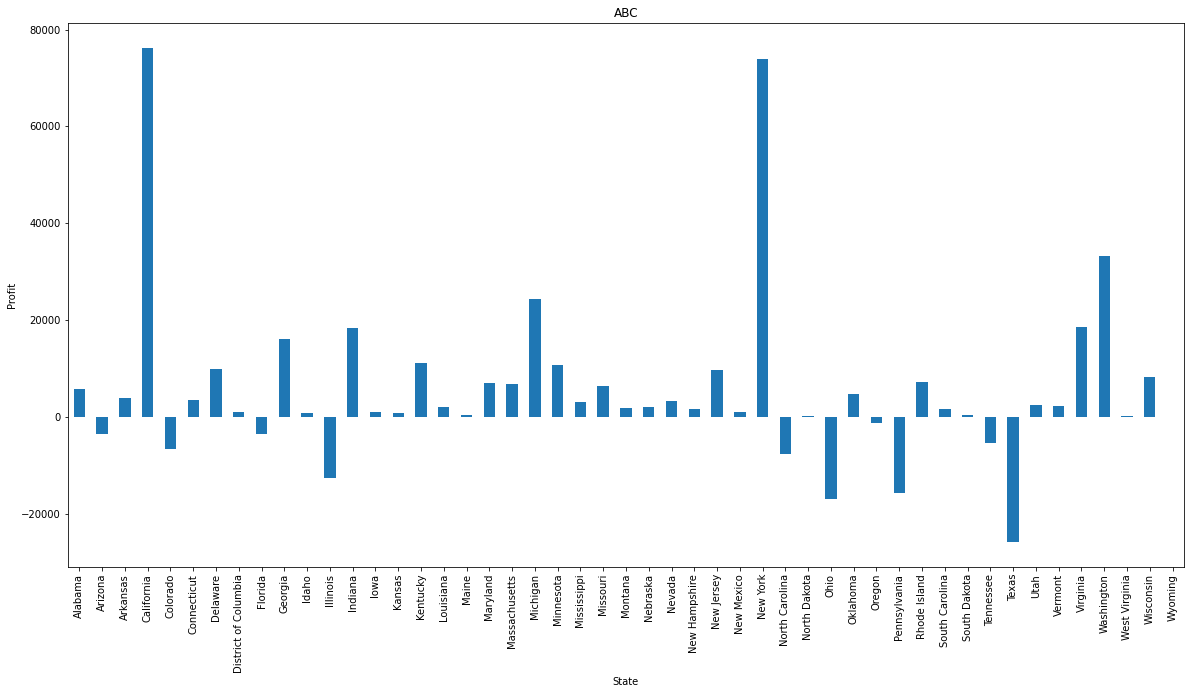

In [14]:
fig,axis=plot.subplots(figsize=(20,10))
plot.title("State Vs Profit")
c.plot.bar()
plot.ylabel('Profit')
plot.show()

###### California and New York are the most profitable states
###### Texas, Ohio and Pennsylvania are at huge losses


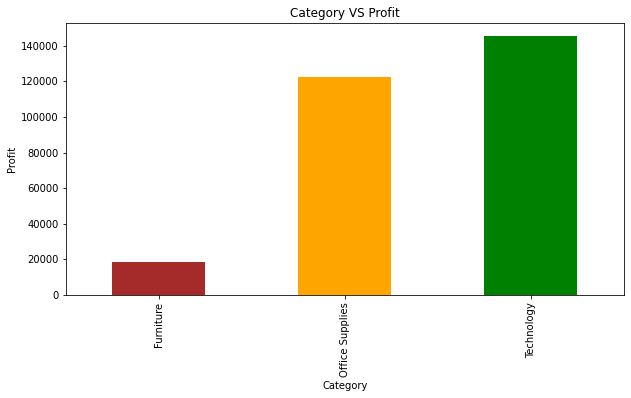

In [19]:
x=data.groupby('Category')['Profit'].sum()
fig,axis=plot.subplots(figsize=(10,5))
plot.title("Category VS Profit")
x.plot.bar(color=['brown','orange','green'])
plot.ylabel('Profit')
plot.show()


#### Technology gives more profit than any other category.
#### The profit from furniture is minimal i.e., it is more loss-providing


In [20]:
b=data.groupby('Sub-Category')['Profit'].sum()
dic=dict(data.groupby('Category')['Sub-Category'].unique())
len(b)

17

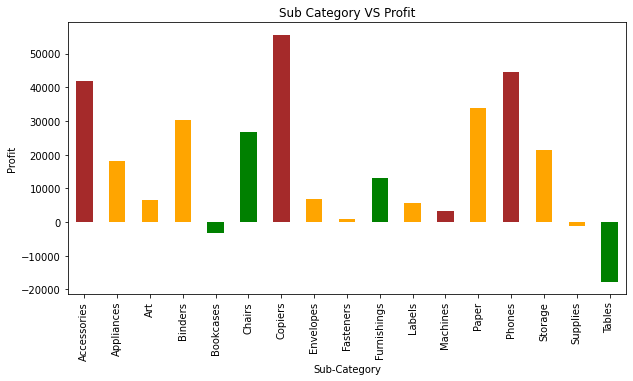

In [30]:

fig,axis=plot.subplots(figsize=(10,5))
plot.title("Sub Category VS Profit")
b.plot.bar(color=['brown','orange','orange','orange','green','green','brown','orange','orange','green','orange','brown','orange','brown','orange','orange','green'])
plot.ylabel('Profit')
plot.show()


###### Sub- Categories with higher Sales:
###### Copiers
###### Phones
###### Accessories
###### Paper

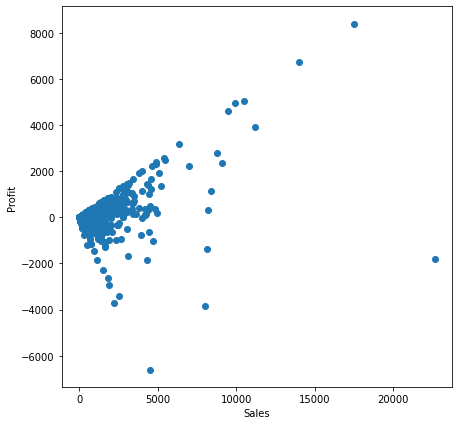

In [22]:
plot.subplots(figsize=(7,7))
plot.scatter(data['Sales'],data['Profit'])
plot.xlabel('Sales')
plot.ylabel('Profit')
plot.show()

###### Profit w.r.t Sales shows typical trend
###### On a major note, it is linearly increasing

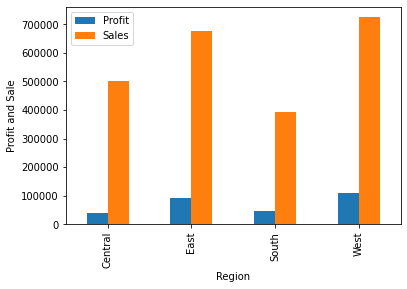

In [23]:
d=data.groupby('Region')[['Profit','Sales']].sum()
d.plot.bar()
plot.ylabel('Profit and Sale')
plot.show()

###### West USA has the highest sales
###### Profit not being in proportion of Sales
###### South USA has least Sales

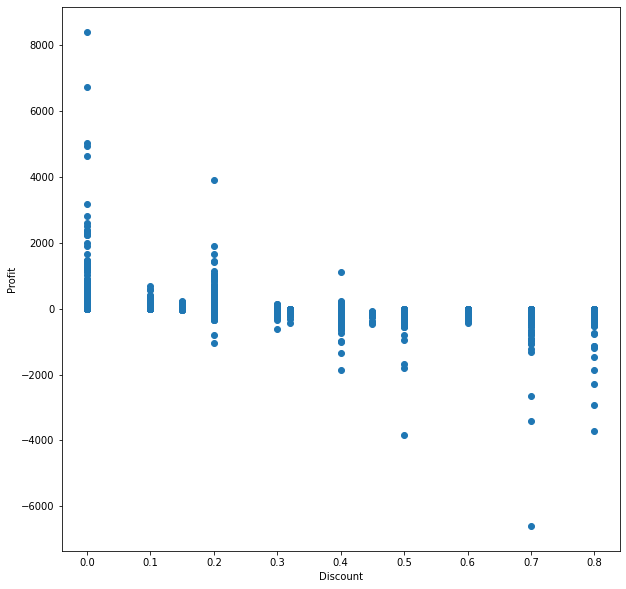

In [27]:
plot.figure(figsize=(10,10))
plot.scatter(data['Discount'],data['Profit'])
plot.xlabel('Discount')
plot.ylabel('Profit')
plot.show()

###### Higher proposed discounts are often leading to losses 

# CONCLUSIONS:
###### Standard shipment mode is usually preferred.
###### South USA gives the least profit as well as sales, therefore is a weaker area.
###### Technology has been the most profitable and selling segment.
###### Noticeable dip in profit values for sales between 0-5000.
###### Increasing discounts(when approx 50%) are often leading to dip in profit margin. 
###### Although all the three segments have considerably different sales, profit margins are not really varying. Therefore, company needs to change the strategy of sale.
###### West region proposes highest sale.